In [ ]:
%pip install opencv-python
%pip install matplotlib
import cv2 as cv

In [ ]:
%pip install pandas
%pip install numpy


In [ ]:
%pip install tqdm

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from glob import glob

import IPython.display as ipd
from tqdm.notebook import tqdm


import subprocess

In [ ]:
import os
input_file = 'C:/Users/user/Desktop/StratAIProject/0000f77c-6257be58.mp4'

if os.path.exists(input_file):
    print("File exist")
else:
    print("File not exist")


In [ ]:
ipd.Video('0000f77c-6257be58.mp4' , width=700 , height=500)

In [ ]:
cap = cv.VideoCapture('0000f77c-6257be58.mp4')

In [ ]:
#Number of FRAMES
frames = cap.get(cv.CAP_PROP_FRAME_COUNT)
print(frames)

In [ ]:
#video Height and width
height = cap.get(cv.CAP_PROP_FRAME_HEIGHT)  
width = cap.get(cv.CAP_PROP_FRAME_WIDTH)
print(f'Height: {height} , Width: {width}')#720*1280p

In [ ]:
#fps
fps = cap.get(cv.CAP_PROP_FPS)
print(f'Frames per second: {fps}')


In [ ]:
cap.release()

In [ ]:
cap = cv.VideoCapture('0000f77c-6257be58.mp4')
ret, img = cap.read()
print(f'Returned {ret} and img of shape {img.shape}')

In [ ]:
img

In [ ]:
plt.imshow(img)

In [ ]:
fig , axs = plt.subplots(5 , 5 ,figsize=(30,20))
axs = axs.flatten()

cap = cv.VideoCapture('0000f77c-6257be58.mp4')  
n_frames = int(cap.get(cv.CAP_PROP_FRAME_COUNT))

img_inx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame % 100 == 0:
        axs[img_inx].imshow(cv.cvtColor(img , cv.COLOR_BGR2RGB))
        axs[img_inx].set_title(f'Frame {frame}')
        axs[img_inx].axis('off')
        img_inx += 1
plt.tight_layout()
plt.show()
cap.release()

In [161]:
#Add Annotations to Video Images
labels = pd.read_csv("C:/Users/user/Downloads/mot_labels.csv/mot_labels.csv")
#labels.head()

video_labels = (
    labels.query ('videoName == "026c7465-309f6d33"').reset_index(drop=True).copy()
)
video_labels.head()
video_labels["video_frame"] = (video_labels["frameIndex"] * 11.9).round().astype("int")

C:\Users\user\AppData\Local\Temp\ipykernel_27904\3166120699.py:2: DtypeWarning: Columns (5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  labels = pd.read_csv("C:/Users/user/Downloads/mot_labels.csv/mot_labels.csv")


In [162]:
video_labels["category"].value_counts()

category
car              3030
pedestrian        847
bicycle           381
rider             320
truck             194
other vehicle     115
bus               109
other person       74
motorcycle         67
trailer            34
Name: count, dtype: int64

In [166]:
#pull frame 1035
cap = cv.VideoCapture('026c7465-309f6d33.mp4')  
n_frames = int(cap.get(cv.CAP_PROP_FRAME_COUNT))

img_inx = 0

for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame == 1035:
        break
       

cap.release()


In [164]:
## Helper function for plotting opencv images in notebook
def display_cv_img(img, figsize=(10, 10)):
   img_ = cv.cvtColor(img, cv.COLOR_BGR2RGB)
   fig, ax = plt.subplots(figsize=figsize)
   ax.imshow(img_)
   ax.axis("off")

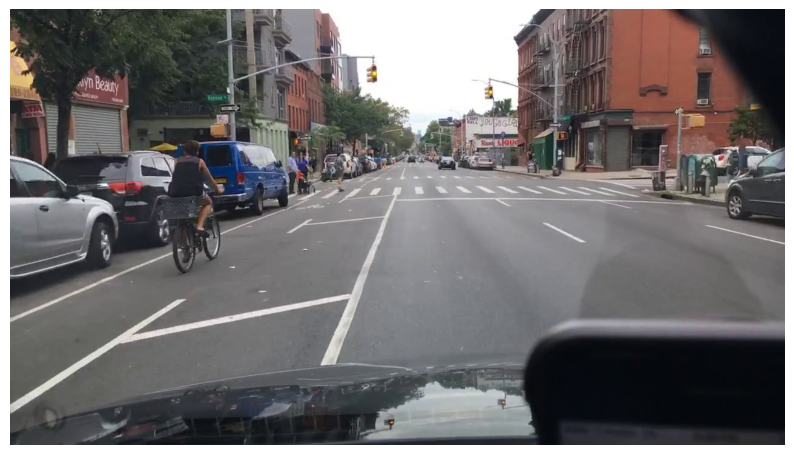

In [167]:
display_cv_img(img)

In [179]:
video_labels["category"].unique()

array(['car', 'truck', 'pedestrian', 'other vehicle', 'rider', 'bicycle',
       'other person', 'trailer', 'motorcycle', 'bus'], dtype=object)

In [180]:
color_map = {
    "car": (0, 0, 255),
    "bus": (255, 0, 0),
    "truck": (0, 255, 0),
    "pedestrian": (255, 255, 0),
    "motorcycle": (255, 0, 255),
    "bicycle": (0, 255, 255),
    "other vehicle": (255, 255, 255),
    "rider": (0, 100, 0),
    "other person": (0, 0, 100),
    "trailer": (100, 0, 0)
}

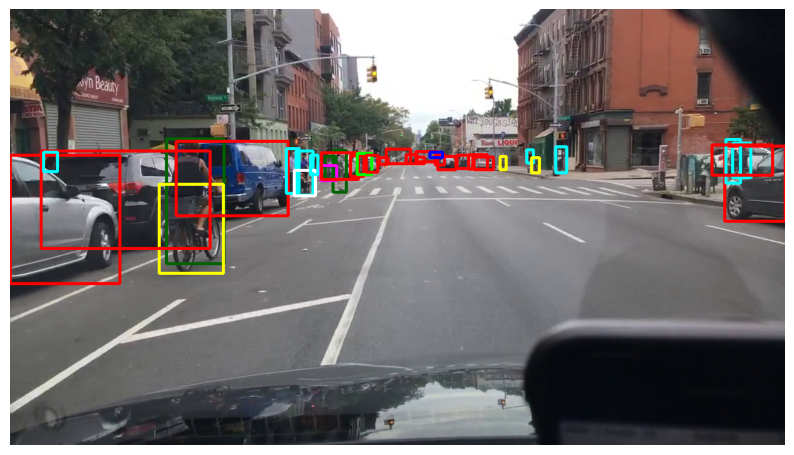

In [182]:
frame_labels = video_labels.query('video_frame == 1035')

for i , d in frame_labels.iterrows():
   pt1 = int(d['box2d.x1']) , int(d['box2d.y1'])
   pt2 = int(d['box2d.x2']) , int(d['box2d.y2'])
   color = color_map[d["category"]]
   cv.rectangle(img , pt1 , pt2 , color , 3)
display_cv_img(img)

In [172]:
video_labels["category"].unique()

array(['car', 'truck', 'pedestrian', 'other vehicle', 'rider', 'bicycle',
       'other person', 'trailer', 'motorcycle', 'bus'], dtype=object)

In [199]:
#Labels for all frames
def add_annotations(img , frame , video_labels):
    max_frame = video_labels.query("video_frame <= @frame")["video_frame"].max()
    frame_labels = video_labels.query("video_frame == @max_frame")

    for i , d in frame_labels.iterrows():
       pt1 = int(d['box2d.x1']) , int(d['box2d.y1'])
       pt2 = int(d['box2d.x2']) , int(d['box2d.y2'])
       color = color_map[d["category"]]
       img = cv.rectangle(img , pt1 , pt2 , color , 3)
    return img

In [197]:
%pip install ipywidgets
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [200]:
from tqdm import tqdm

fps = 59.94
width = 1280
height = 720
out_video = cv.VideoWriter("output.mp4" , cv.VideoWriter_fourcc(*'mp4v') , 
                           30 , 
                           (width , height))
n_frames = int(cap.get(cv.CAP_PROP_FRAME_COUNT))

cap = cv.VideoCapture('026c7465-309f6d33.mp4')   

for frame in tqdm(range(n_frames)):
    ret , img = cap.read()
    if ret == False:
        break
    img = add_annotations(img , frame , video_labels)
    out_video.write(img)

out_video.release()
cap.release()